# AI PROJECT ON 101 Food Classification :-|

# BUSINESS CASE:- Based on the image data we need to predict the 101 food clases. 

### GROUP ID: PTID-AI-Jul-23-1020

### PROJECT ID: PRAICP-1009-101 food classes classification 

## TASK: MULTICLASS CLASSIFICATION :-

## WE DEVICE THIS PROJECT INTO MULTIPLE STEPS :-
* Importing library
* Data Processing [Prepare training and testing data]
* Build Arcitecture
* Model Compilation
* Training
* Evaluation
* Model saving
* Prediction
* Testing
* Visualise Test Images
* Deploy model using flask framework

## PYTHON IMPLIMENTATION :-

### IMPORTING NECESSARY LIBRARY :-



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from pathlib import Path
import os.path
import seaborn as sns

## Mounting Google Drive :-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###  Dataset :-

In [2]:
image_dir = Path(r"C:\Users\GANESH AHIRE\Documents\AI Expert Project\Food Classification\101_Food_500")

In [30]:
class_dict={
    'apple_pie':'CONFECTIONARY',
    'baby_back_ribs':'BEEF',
    'baklava':'CONFECTIONARY',
    'beef_carpaccio':'BEEF',
    'beef_tartare':'BEEF',
    'beet_salad':'SALAD',
    'beignets':'CONFECTIONARY',
    'bibimbap':'RICE',
    'bread_pudding':'BREAD',
    'breakfast_burrito':'BURRITO',
    'bruschetta':'BREAD',
    'caesar_salad':'SALAD',
    'cannoli':'CONFECTIONARY',
    'caprese_salad':'SALAD',
    'carrot_cake':'CONFECTIONARY',
    'ceviche':'FISH',
    'cheese_plate':'CHEESE',
    'cheesecake':'CHEESE',
    'chicken_curry':'CHICKEN',
    'chicken_quesadilla':'CHICKEN',
    'chicken_wings':'CHICKEN',
    'chocolate_cake':'CONFECTIONARY',
    'chocolate_mousse':'DESSERT',
    'churros':'CONFECTIONARY',
    'clam_chowder':'CLAM',
    'club_sandwich':'SANDWICH',
    'crab_cakes':'CRAB',
    'creme_brulee':'DESSERT',
    'croque_madame':'SANDWICH',
    'cup_cakes':'CONFECTIONARY',
    'deviled_eggs':'EGG',
    'donuts':'CONFECTIONARY',
    'dumplings':'DUMPLINGS',
    'edamame':'SOYBEANS',
    'eggs_benedict':'EGG',
    'escargots':'SNAIL',
    'falafel':'CHICKPEAS',
    'filet_mignon':'BEEF',
    'fish_and_chips':'FISH',
    'foie_gras':'DUCK',
    'french_fries':'POTATO',
    'french_onion_soup':'SOUP',
    'french_toast':'BREAD',
    'fried_calamari':'SQUID',
    'fried_rice':'RICE',
    'frozen_yogurt':'YOGURT',
    'garlic_bread':'BREAD',
    'gnocchi':'PASTA',
    'greek_salad':'SALAD',
    'grilled_cheese_sandwich':'BREAD',
    'grilled_salmon':'SALMON',
    'guacamole':'AVACADO',
    'gyoza':'DUMPLINGS',
    'hamburger':'BEEF',
    'hot_and_sour_soup':'SOUP',
    'hot_dog':'PORK',
    'huevos_rancheros':'BURRITO',
    'hummus':'CHICKPEAS',
    'ice_cream':'DESSERT',
    'lasagna':'PASTA',
    'lobster_bisque':'LOBSTER',
    'lobster_roll_sandwich':'SANDWICH',
    'macaroni_and_cheese':'PASTA',
    'macarons':'CONFECTIONARY',
    'miso_soup':'SOUP',
    'mussels':'MUSSELS',
    'nachos':'CHIPS',
    'omelette':'EGG',
    'onion_rings':'ONIONS',
    'oysters':'CLAM',
    'pad_thai':'NOODLES',
    'paella':'RICE',
    'pancakes':'BREAD',
    'panna_cotta':'DESSERT',
    'peking_duck':'DUCK',
    'pho':'NOODLES',
    'pizza':'PIZZA',
    'pork_chop':'PORK',
    'poutine':'POTATO',
    'prime_rib':'BEEF',
    'pulled_pork_sandwich':'SANDWICH',
    'ramen':'NOODLES',
    'ravioli':'PASTA',
    'red_velvet_cake':'CONFECTIONARY',
    'risotto':'PASTA',
    'samosa':'CONFECTIONARY',
    'sashimi':'FISH',
    'scallops':'SALMON',
    'seaweed_salad':'SALAD',
    'shrimp_and_grits':'SHRIMP',
    'spaghetti_bolognese':'PASTA',
    'spaghetti_carbonara':'PASTA',
    'spring_rolls':'CONFECTIONARY',
    'steak':'BEEF',
    'strawberry_shortcake':'DESSERT',
    'sushi':'FISH',
    'tacos':'BURRITO',
    'takoyaki':'SHRIMP',
    'tiramisu':'DESSERT',
    'tuna_tartare':'FISH',
    'waffles':'CONFECTIONARY',
}

In [6]:
# Iterate through the class_dict dictionary
for i in class_dict:
    print(i, end=" : ")
    print(class_dict[i])

# Print the total number of class labels
print(len(class_dict))

# Create a set of unique class values
s = set(class_dict.values())

# Print the number of unique class values
print(len(s))


apple_pie : CONFECTIONARY
baby_back_ribs : BEEF
baklava : CONFECTIONARY
beef_carpaccio : BEEF
beef_tartare : BEEF
beet_salad : SALAD
beignets : CONFECTIONARY
bibimbap : RICE
bread_pudding : BREAD
breakfast_burrito : BURRITO
bruschetta : BREAD
caesar_salad : SALAD
cannoli : CONFECTIONARY
caprese_salad : SALAD
carrot_cake : CONFECTIONARY
ceviche : FISH
cheese_plate : CHEESE
cheesecake : CHEESE
chicken_curry : CHICKEN
chicken_quesadilla : CHICKEN
chicken_wings : CHICKEN
chocolate_cake : CONFECTIONARY
chocolate_mousse : DESSERT
churros : CONFECTIONARY
clam_chowder : CLAM
club_sandwich : SANDWICH
crab_cakes : CRAB
creme_brulee : DESSERT
croque_madame : SANDWICH
cup_cakes : CONFECTIONARY
deviled_eggs : EGG
donuts : CONFECTIONARY
dumplings : DUMPLINGS
edamame : SOYBEANS
eggs_benedict : EGG
escargots : SNAIL
falafel : CHICKPEAS
filet_mignon : BEEF
fish_and_chips : FISH
foie_gras : DUCK
french_fries : POTATO
french_onion_soup : SOUP
french_toast : BREAD
fried_calamari : SQUID
fried_rice : RICE


In [7]:
print(s)

{'BEEF', 'CHIPS', 'SALAD', 'SNAIL', 'PIZZA', 'SALMON', 'CONFECTIONARY', 'SHRIMP', 'CLAM', 'PASTA', 'SOUP', 'DUMPLINGS', 'AVACADO', 'RICE', 'NOODLES', 'BURRITO', 'DESSERT', 'SANDWICH', 'CHEESE', 'ONIONS', 'BREAD', 'POTATO', 'FISH', 'CHICKEN', 'CRAB', 'CHICKPEAS', 'SQUID', 'MUSSELS', 'YOGURT', 'DUCK', 'PORK', 'SOYBEANS', 'LOBSTER', 'EGG'}


## Prepare Training, Validation & Testing Data :-
* Images are loaded,their labels using OpenCV and glob from a directory containing subdirectories, and creating a dataset by  resized the images to a consistent size of 128x128 pixels, and converted to grayscale to reduce computational complexity. The dataset is divided into training, validation, and testing sets

In [10]:
train_images_set = []
train_labels_set = []

# Iterate through each subdirectory in the given image directory
for directory_path in glob.glob(os.path.join(image_dir, "*")):
    # Extract the label name from the directory path
    label1 = os.path.basename(directory_path)
    print(label1, end=" : ")
    
    # Initialize the label with a default value
    label = 'null'
    
    # Match the label name with the class_dict to get the corresponding label
    for i in class_dict:
        if i == label1:
            label = class_dict[i]
            break
    
    # Print the label for the current directory
    print(label)
    
    # Counter to keep track of processed images
    x = int(0)
    
    # Loop through image files in the current directory
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # Read the image, resize to 128x128 pixels, and convert to grayscale
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Append the processed image and corresponding label to the lists
        train_images_set.append(img)
        train_labels_set.append(label)
        
        # Increment the counter
        x = x + int(1)
        
        # Limit the number of processed images to 80 per directory
        if x == int(80):
            break


apple_pie : CONFECTIONARY
baby_back_ribs : BEEF
baklava : CONFECTIONARY
beef_carpaccio : BEEF
beef_tartare : BEEF
beet_salad : SALAD
beignets : CONFECTIONARY
bibimbap : RICE
bread_pudding : BREAD
breakfast_burrito : BURRITO
bruschetta : BREAD
caesar_salad : SALAD
cannoli : CONFECTIONARY
caprese_salad : SALAD
carrot_cake : CONFECTIONARY
ceviche : FISH
cheesecake : CHEESE
cheese_plate : CHEESE
chicken_curry : CHICKEN
chicken_quesadilla : CHICKEN
chicken_wings : CHICKEN
chocolate_cake : CONFECTIONARY
chocolate_mousse : DESSERT
churros : CONFECTIONARY
clam_chowder : CLAM
club_sandwich : SANDWICH
crab_cakes : CRAB
creme_brulee : DESSERT
croque_madame : SANDWICH
cup_cakes : CONFECTIONARY
deviled_eggs : EGG
donuts : CONFECTIONARY
dumplings : DUMPLINGS
edamame : SOYBEANS
eggs_benedict : EGG
escargots : SNAIL
falafel : CHICKPEAS
filet_mignon : BEEF
fish_and_chips : FISH
foie_gras : DUCK
french_fries : POTATO
french_onion_soup : SOUP
french_toast : BREAD
fried_calamari : SQUID
fried_rice : RICE


In [11]:
val_images_set = []
val_labels_set = []
for directory_path in glob.glob(os.path.join(image_dir, "*")):
    label1 = os.path.basename(directory_path)

    print(label1)
    for j in class_dict:
        if(j==label1):
            label=class_dict[j]
            break
    print(label)
    x = int(0)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        x = x +int(1)
        if x == int(80):
            break

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128,128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        val_images_set.append(img)
        val_labels_set.append(label)
        x = x + int(1)
        if x == int(100):
            break

apple_pie
CONFECTIONARY
baby_back_ribs
BEEF
baklava
CONFECTIONARY
beef_carpaccio
BEEF
beef_tartare
BEEF
beet_salad
SALAD
beignets
CONFECTIONARY
bibimbap
RICE
bread_pudding
BREAD
breakfast_burrito
BURRITO
bruschetta
BREAD
caesar_salad
SALAD
cannoli
CONFECTIONARY
caprese_salad
SALAD
carrot_cake
CONFECTIONARY
ceviche
FISH
cheesecake
CHEESE
cheese_plate
CHEESE
chicken_curry
CHICKEN
chicken_quesadilla
CHICKEN
chicken_wings
CHICKEN
chocolate_cake
CONFECTIONARY
chocolate_mousse
DESSERT
churros
CONFECTIONARY
clam_chowder
CLAM
club_sandwich
SANDWICH
crab_cakes
CRAB
creme_brulee
DESSERT
croque_madame
SANDWICH
cup_cakes
CONFECTIONARY
deviled_eggs
EGG
donuts
CONFECTIONARY
dumplings
DUMPLINGS
edamame
SOYBEANS
eggs_benedict
EGG
escargots
SNAIL
falafel
CHICKPEAS
filet_mignon
BEEF
fish_and_chips
FISH
foie_gras
DUCK
french_fries
POTATO
french_onion_soup
SOUP
french_toast
BREAD
fried_calamari
SQUID
fried_rice
RICE
frozen_yogurt
YOGURT
garlic_bread
BREAD
gnocchi
PASTA
greek_salad
SALAD
grilled_cheese_san

In [12]:
test_images_set = []
test_labels_set = []
for directory_path in glob.glob(os.path.join(image_dir, "*")):
    label1 = os.path.basename(directory_path)

    print(label1)
    for j in class_dict:
        if(j==label1):
            label=class_dict[j]
            break
    print(label)
    x = int(0)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        x = x +int(1)
        if x == int(100):
            break

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128,128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        test_images_set.append(img)
        test_labels_set.append(label)
        x = x + int(1)
        if x == int(130):
            break


apple_pie
CONFECTIONARY
baby_back_ribs
BEEF
baklava
CONFECTIONARY
beef_carpaccio
BEEF
beef_tartare
BEEF
beet_salad
SALAD
beignets
CONFECTIONARY
bibimbap
RICE
bread_pudding
BREAD
breakfast_burrito
BURRITO
bruschetta
BREAD
caesar_salad
SALAD
cannoli
CONFECTIONARY
caprese_salad
SALAD
carrot_cake
CONFECTIONARY
ceviche
FISH
cheesecake
CHEESE
cheese_plate
CHEESE
chicken_curry
CHICKEN
chicken_quesadilla
CHICKEN
chicken_wings
CHICKEN
chocolate_cake
CONFECTIONARY
chocolate_mousse
DESSERT
churros
CONFECTIONARY
clam_chowder
CLAM
club_sandwich
SANDWICH
crab_cakes
CRAB
creme_brulee
DESSERT
croque_madame
SANDWICH
cup_cakes
CONFECTIONARY
deviled_eggs
EGG
donuts
CONFECTIONARY
dumplings
DUMPLINGS
edamame
SOYBEANS
eggs_benedict
EGG
escargots
SNAIL
falafel
CHICKPEAS
filet_mignon
BEEF
fish_and_chips
FISH
foie_gras
DUCK
french_fries
POTATO
french_onion_soup
SOUP
french_toast
BREAD
fried_calamari
SQUID
fried_rice
RICE
frozen_yogurt
YOGURT
garlic_bread
BREAD
gnocchi
PASTA
greek_salad
SALAD
grilled_cheese_san

In [13]:
train_images = np.array(train_images_set)
train_labels = np.array(train_labels_set)
val_images = np.array(val_images_set)
val_labels = np.array(val_labels_set)
test_images = np.array(test_images_set)
test_labels = np.array(test_labels_set)

In [32]:
print("train_images=>",len(train_images))
print("train_labels=>",len(train_labels))
print("val_images=>",len(val_images))
print("val_labels=>",len(val_labels))
print("test_images=>",len(test_images))
print("test_labels=>",len(test_labels))

train_images=> 8080
train_labels=> 8080
val_images=> 2020
val_labels=> 2020
test_images=> 3030
test_labels=> 3030


In [12]:
from sklearn import preprocessing

# Label Encoding
le = preprocessing.LabelEncoder()



# Encode train labels
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# Encode validation labels
le.fit(val_labels)
val_labels_encoded = le.transform(val_labels)

# Encode test labels
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

* label encoding is applied to convert class labels into numerical values.

In [13]:
x_train, y_train, x_val, y_val, x_test, y_test = train_images, train_labels_encoded, val_images, val_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


In [14]:
#  This function is used to convert integer categorical labels into one-hot encoded vectors.
from keras.utils import to_categorical

# Convert categorical labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)


## BUILD CONVOLUTIONAL NEURAL  NETWORK(CNN) ARCHITECTURE :-

In [15]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (128, 128, 1)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())


In [16]:
x = feature_extractor.output
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(34, activation = 'softmax')(x)

In [17]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)


### COMPILE MODEL :-

In [18]:
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0     

### TRAIN MODEL

In [19]:
cnn_history = cnn_model.fit(x_train, y_train_one_hot, epochs=20, validation_data=(x_val, y_val_one_hot))


Epoch 1/20
253/253 [==============================] - 422s 2s/step - loss: 3.2477 - accuracy: 0.1325 - val_loss: 3.3935 - val_accuracy: 0.1386
Epoch 2/20
253/253 [==============================] - 423s 2s/step - loss: 3.1577 - accuracy: 0.1408 - val_loss: 3.5053 - val_accuracy: 0.1371
Epoch 3/20
253/253 [==============================] - 430s 2s/step - loss: 3.0923 - accuracy: 0.1573 - val_loss: 3.1350 - val_accuracy: 0.1475
Epoch 4/20
253/253 [==============================] - 425s 2s/step - loss: 3.0167 - accuracy: 0.1694 - val_loss: 3.0201 - val_accuracy: 0.1782
Epoch 5/20
253/253 [==============================] - 394s 2s/step - loss: 2.9366 - accuracy: 0.1828 - val_loss: 2.9715 - val_accuracy: 0.1881
Epoch 6/20
253/253 [==============================] - 386s 2s/step - loss: 2.8464 - accuracy: 0.1980 - val_loss: 3.1855 - val_accuracy: 0.1436
Epoch 7/20
253/253 [==============================] - 383s 2s/step - loss: 2.7523 - accuracy: 0.2248 - val_loss: 2.7402 - val_accuracy: 0.2470

### PLOTTING TRAINING & VALIDATION ACCURAY AS WELL AS LOSS & VALIDATION LOSS :-

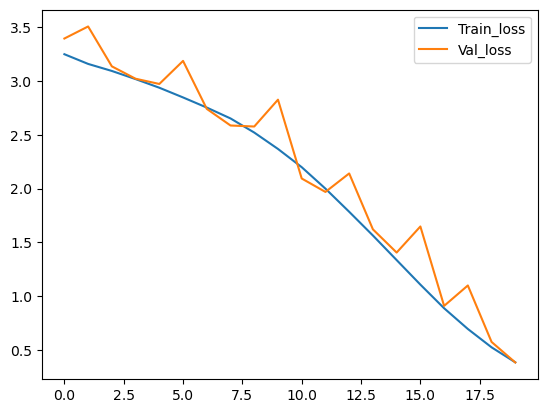

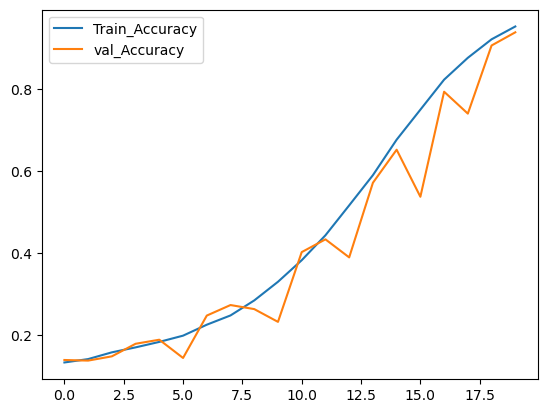

<Figure size 640x480 with 0 Axes>

In [20]:
 # Training loss and validation loss
plt.plot(cnn_history.history['loss'], label='Train_loss')
plt.plot(cnn_history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_valLoss')


# Training accuracy and validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Train_Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_ValAccuracy')

* The plots show that the accuracy of the model increased with epochs and the loss has decreased.
* Validation accuracy has been on the higher side than training accuracy for many epochs.

### MODEL EVALUATION :-

In [21]:
train_result = cnn_model.evaluate(x_train, y_train_one_hot)
print("Train Accuracy & Loss:",train_result)

test_result = cnn_model.evaluate(x_test, y_test_one_hot)
print("Testing Accuracy & Loss",test_result)

253/253 [==============================] - 58s 227ms/step - loss: 0.3983 - accuracy: 0.9354
Train Accuracy & Loss: [0.3983122706413269, 0.9353960156440735]
95/95 [==============================] - 23s 237ms/step - loss: 0.3893 - accuracy: 0.9383
Testing Accuracy & Loss [0.38930457830429077, 0.9382838010787964]


In [23]:
# Create a dataframe
import pandas as pd
data = pd.DataFrame(zip(train_result,test_result), columns=['Train','Test'],index=['Loss','Accuracy'])
data

,Train,Test
Loss,0.398312,0.389305
Accuracy,0.935396,0.938284


95/95 [==============================] - 21s 212ms/step
[[ 25   1   2 ...   0   0   0]
 [  0 207   1 ...   0   0   0]
 [  0   0 175 ...   0   0   0]
 ...
 [  0   0   0 ...  26   0   0]
 [  0   0   1 ...   0  25   0]
 [  0   0   0 ...   0   0  24]]


<Axes: >

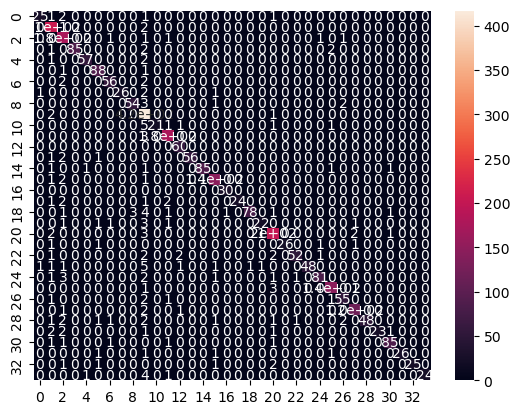

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.argmax(cnn_model.predict(x_test), axis=1)

predictions = le.inverse_transform(predictions)

cm = confusion_matrix(test_labels, predictions)
print(cm)
sns.heatmap(cm, annot=True)

### MODEL SAVING :-

In [25]:
# Saving model with the help of h5
cnn_model.save('cnn_model.h5')

C:\Users\GANESH AHIRE\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### VISUALISE  TESTING IMAGES :-

1/1 [==============================] - 0s 32ms/step
The prediction for this image is:  ['NOODLES']
The actual label for this image is:  NOODLES


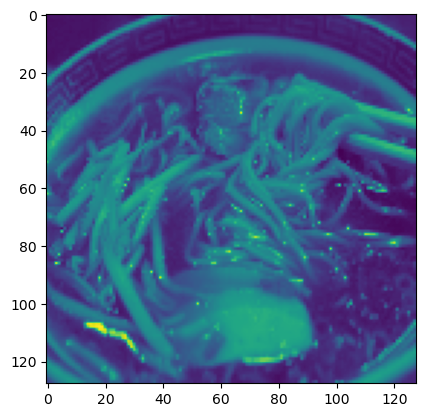

In [40]:
n=2459
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
prediction = np.argmax(cnn_model.predict(input_img))  
prediction = le.inverse_transform([prediction]) 
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 0s 37ms/step
The prediction for this image is:  ['SANDWICH']
The actual label for this image is:  SANDWICH


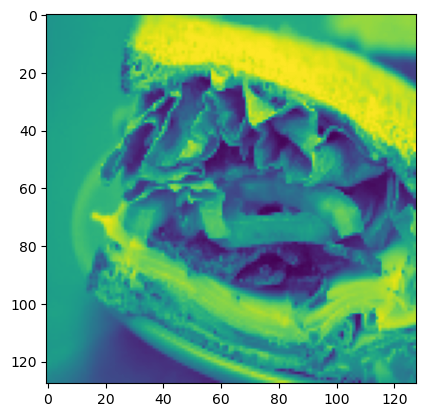

In [47]:
n=758
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
prediction = np.argmax(cnn_model.predict(input_img))  
prediction = le.inverse_transform([prediction]) 
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

* We trained a model on 101 classes and tested it using new data
* The model was able to predict the classes of TWO test images correctly 

## CONCLUSION:-
* In this project, a Convolutional Neural Network (CNN) was successfully developed and trained for food image classification. The model demonstrated excellent accuracy on both training and testing datasets, indicating its ability to effectively classify food images into their respective categories.